In [71]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [72]:
df = pd.read_csv('bmw_dataset.csv')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 49999 non-null  object 
 1   Year                  49998 non-null  float64
 2   Region                49998 non-null  object 
 3   Color                 49997 non-null  object 
 4   Fuel_Type             49999 non-null  object 
 5   Transmission          49996 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            49997 non-null  float64
 8   Price_USD             49996 non-null  float64
 9   Sales_Volume          49999 non-null  float64
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(5), object(6)
memory usage: 4.2+ MB


In [74]:
def FillMissingValues(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype == 'object':
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna(df[col].mean(), inplace=True)
    return df

In [75]:
def Encoder(df):
    encoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = encoder.fit_transform(df[col])
    return df

In [76]:
def Scaler(df):
    scaler = MinMaxScaler()
    num_col = df.select_dtypes(include=['float64', 'int64']).columns.drop('Price_USD')
    df[num_col] = scaler.fit_transform(df[num_col])
    return df

In [77]:
FillMissingValues(df)
df = Encoder(df)
df = Scaler(df)

C:\Users\user\AppData\Local\Temp\ipykernel_10172\2195168532.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\user\AppData\Local\Temp\ipykernel_10172\2195168532.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  float64
 1   Year                  50000 non-null  float64
 2   Region                50000 non-null  float64
 3   Color                 50000 non-null  float64
 4   Fuel_Type             50000 non-null  float64
 5   Transmission          50000 non-null  float64
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  float64
 8   Price_USD             50000 non-null  float64
 9   Sales_Volume          50000 non-null  float64
 10  Sales_Classification  50000 non-null  float64
dtypes: float64(11)
memory usage: 4.2 MB


In [79]:
import matplotlib.pyplot as plt

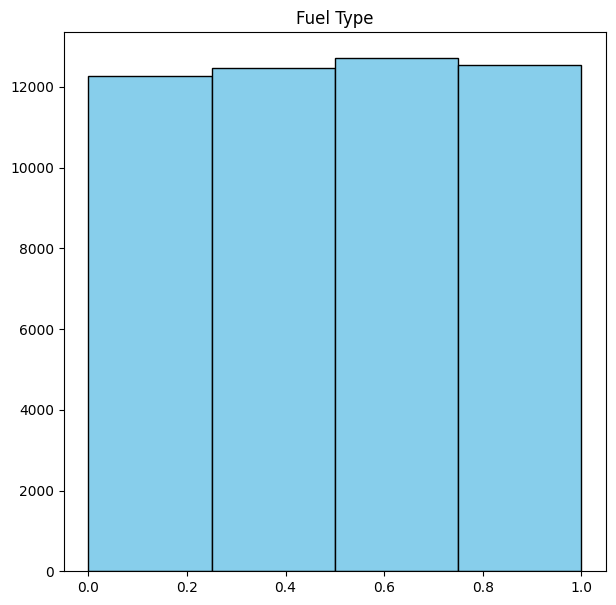

In [ ]:
plt.figure(figsize=[7, 7])
plt.hist(df['Fuel_Type'], bins=4, color='skyblue', edgecolor='black')
plt.title('Fuel Type')
plt.show()

In [81]:
import plotly.express as px

In [82]:
fig = px.scatter(df, x='Year', y='Price_USD', color='Sales_Volume', size='Mileage_KM')
fig.show()

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [84]:
from sklearn.model_selection import train_test_split

x = df.drop('Price_USD', axis=1)
y = df['Price_USD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.metrics import r2_score, mean_absolute_error

# LinearRegression

In [86]:
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [87]:
lr_score = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)

In [88]:
lr_score

-0.0007573373706792896

In [89]:
lr_mae

22570.186772556634

# Decision Tree

In [90]:
dt = DecisionTreeRegressor(random_state=42)

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

In [91]:
dt_score = r2_score(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)

In [92]:
dt_score

-1.0277572728894593

In [93]:
dt_mae

30266.221529320348

# Random Forest

In [94]:
rf = RandomForestRegressor(random_state=42)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

In [95]:
rf_score = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)

In [96]:
rf_score

-0.024612539275754797

In [97]:
rf_mae

22718.307088654372

# CVM

In [98]:
cvm = SVR(kernel='rbf', C=50.0)

cvm.fit(x_train, y_train)

y_pred = cvm.predict(x_test)

In [99]:
cvm_score = r2_score(y_test, y_pred)
cvm_mae = mean_absolute_error(y_test, y_pred)

In [100]:
cvm_score

-0.0002423264233673006

In [101]:
cvm_mae

22564.45504245584

# KNN

In [102]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [103]:
knn_score = r2_score(y_test, y_pred)
knn_mae = mean_absolute_error(y_test, y_pred)

In [104]:
knn_score

-0.19366749947026518

In [105]:
knn_mae

24015.58055413593

# Tabulate

In [106]:
from tabulate import tabulate

In [107]:
result = [
    ['Linear Regression', lr_score, lr_mae],
    ['Decision Tree', dt_score, dt_mae],
    ['Random Forest', rf_score, rf_mae],
    ['CVM', cvm_score, cvm_mae],
    ['KNN', knn_score, knn_mae],
]

headers = ['Algorithm', 'r2_score', 'mean_absolute_error']

table = tabulate(result, headers=headers, tablefmt='grid', floatfmt='.2f')

In [108]:
print(table)

+-------------------+------------+-----------------------+
| Algorithm         |   r2_score |   mean_absolute_error |
+===================+============+=======================+
| Linear Regression |      -0.00 |              22570.19 |
+-------------------+------------+-----------------------+
| Decision Tree     |      -1.03 |              30266.22 |
+-------------------+------------+-----------------------+
| Random Forest     |      -0.02 |              22718.31 |
+-------------------+------------+-----------------------+
| CVM               |      -0.00 |              22564.46 |
+-------------------+------------+-----------------------+
| KNN               |      -0.19 |              24015.58 |
+-------------------+------------+-----------------------+
